In [1]:
import numpy as np
import os
import sys
import tensorflow as tf
import time

from glob import glob
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline

/home/surya/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
model_30k = 'frozen_inference_graph_v_30k.pb'
PATH_TO_LABELS = 'label_map.pbtxt'
NUM_CLASSES = 14

In [3]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'Green'}, 2: {'id': 2, 'name': 'Red'}, 3: {'id': 3, 'name': 'Yellow'}, 4: {'id': 4, 'name': 'off'}}


In [4]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [5]:
detection_graph = tf.Graph()

with detection_graph.as_default():
    
  od_graph_def = tf.GraphDef()

  with tf.gfile.GFile(model_30k, 'rb') as fid:
        
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [6]:
PATH_TO_TEST_IMAGES_DIR = 'test_images_sim'

print(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.jpg'))
TEST_IMAGE_PATHS = glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, '*.jpg'))
print("Length of test images:", len(TEST_IMAGE_PATHS))

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

test_images_sim/*.jpg
Length of test images: 12


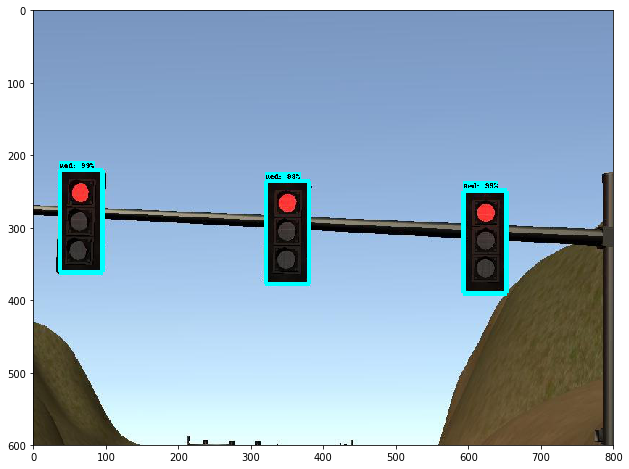

Red 0.9999279
Distance (metres) 0.0
Time in milliseconds 3031.533718109131 

Red 0.99990296
Distance (metres) 0.0
Time in milliseconds 3031.533718109131 

Red 0.9998399
Distance (metres) 0.0
Time in milliseconds 3031.533718109131 



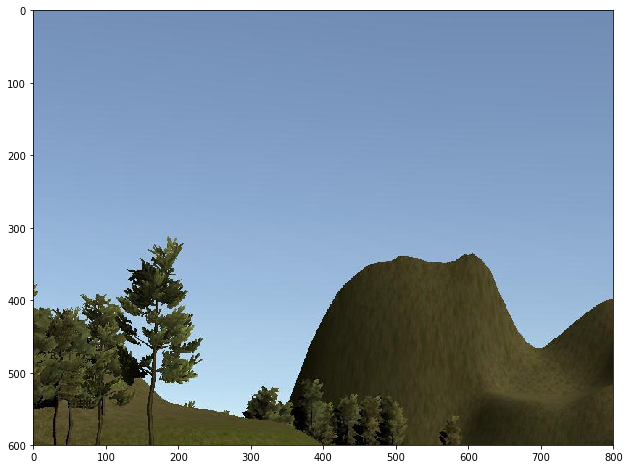

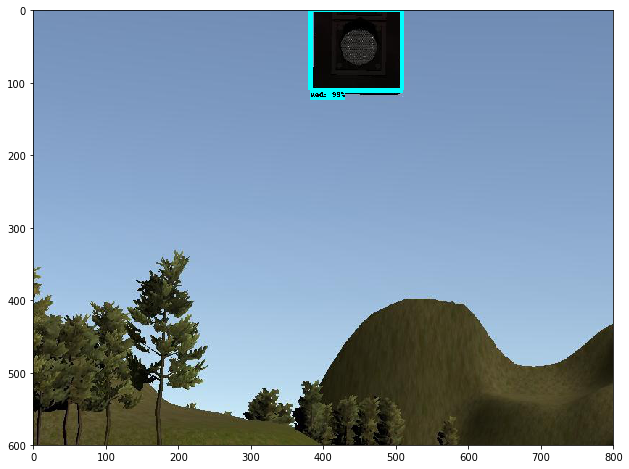

Red 0.99706405
Distance (metres) 0.0
Time in milliseconds 18.764257431030273 



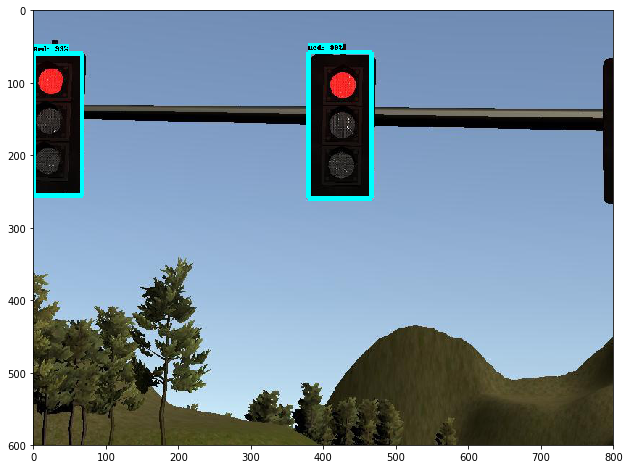

Red 0.9999927
Distance (metres) 0.0
Time in milliseconds 18.717288970947266 

Red 0.99331325
Distance (metres) 0.0
Time in milliseconds 18.717288970947266 



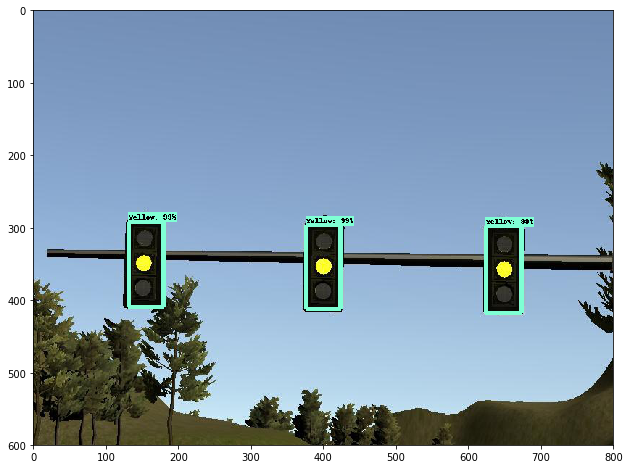

Yellow 0.99947244
Distance (metres) 0.0
Time in milliseconds 17.374038696289062 

Yellow 0.9991978
Distance (metres) 0.0
Time in milliseconds 17.374038696289062 

Yellow 0.99392515
Distance (metres) 0.0
Time in milliseconds 17.374038696289062 



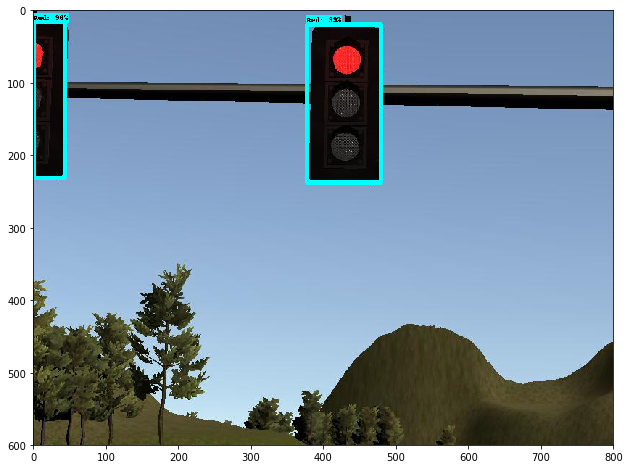

Red 0.9999987
Distance (metres) 0.0
Time in milliseconds 18.630027770996094 

Red 0.969612
Distance (metres) 0.0
Time in milliseconds 18.630027770996094 



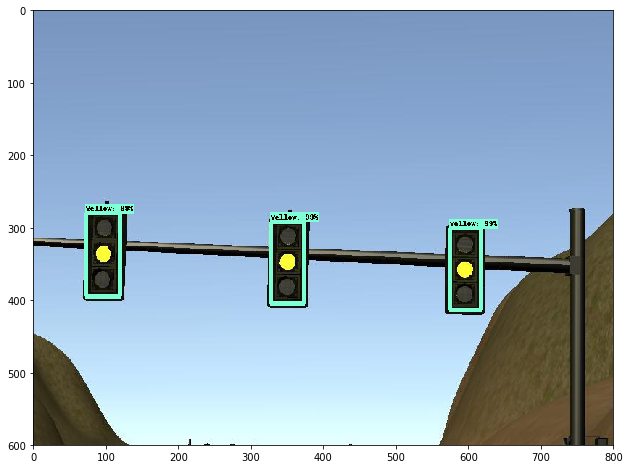

Yellow 0.9995277
Distance (metres) 0.0
Time in milliseconds 18.563032150268555 

Yellow 0.9982377
Distance (metres) 0.0
Time in milliseconds 18.563032150268555 

Yellow 0.9910726
Distance (metres) 0.0
Time in milliseconds 18.563032150268555 



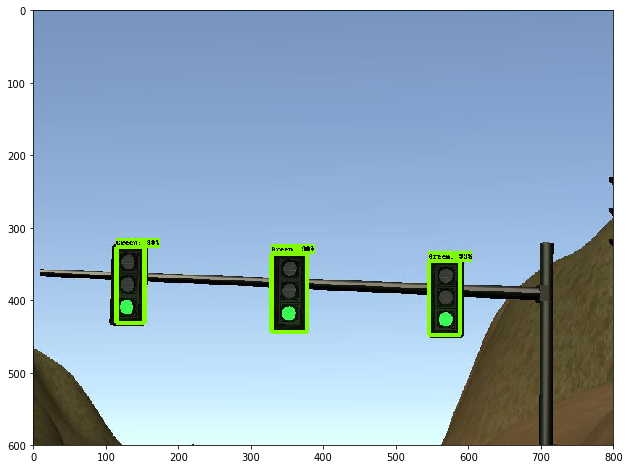

Green 0.99986696
Distance (metres) 0.0
Time in milliseconds 18.192291259765625 

Green 0.99966025
Distance (metres) 0.0
Time in milliseconds 18.192291259765625 

Green 0.9840099
Distance (metres) 0.0
Time in milliseconds 18.192291259765625 



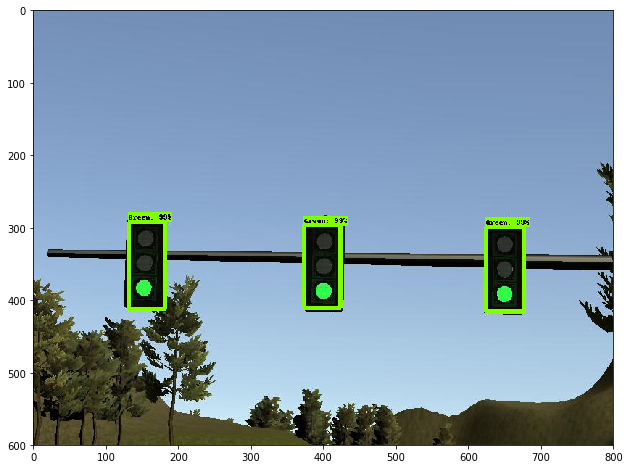

Green 0.9987633
Distance (metres) 0.0
Time in milliseconds 18.665075302124023 

Green 0.9973043
Distance (metres) 0.0
Time in milliseconds 18.665075302124023 

Green 0.99670154
Distance (metres) 0.0
Time in milliseconds 18.665075302124023 



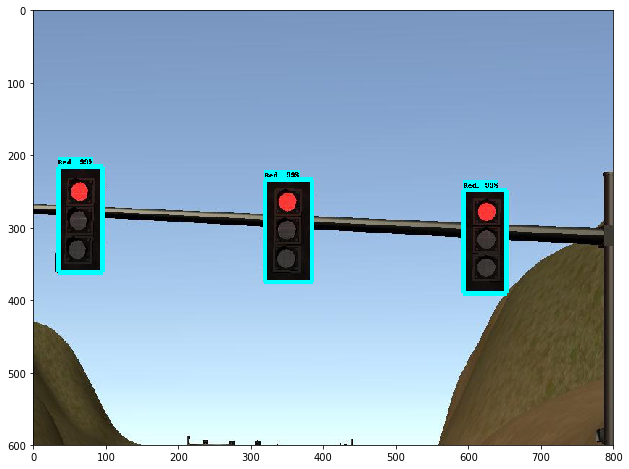

Red 0.999972
Distance (metres) 0.0
Time in milliseconds 18.517494201660156 

Red 0.9999305
Distance (metres) 0.0
Time in milliseconds 18.517494201660156 

Red 0.9996438
Distance (metres) 0.0
Time in milliseconds 18.517494201660156 



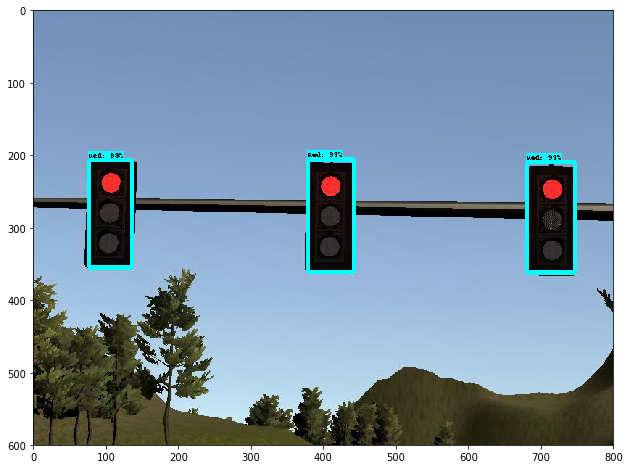

Red 0.99993694
Distance (metres) 0.0
Time in milliseconds 18.893003463745117 

Red 0.99986947
Distance (metres) 0.0
Time in milliseconds 18.893003463745117 

Red 0.999653
Distance (metres) 0.0
Time in milliseconds 18.893003463745117 



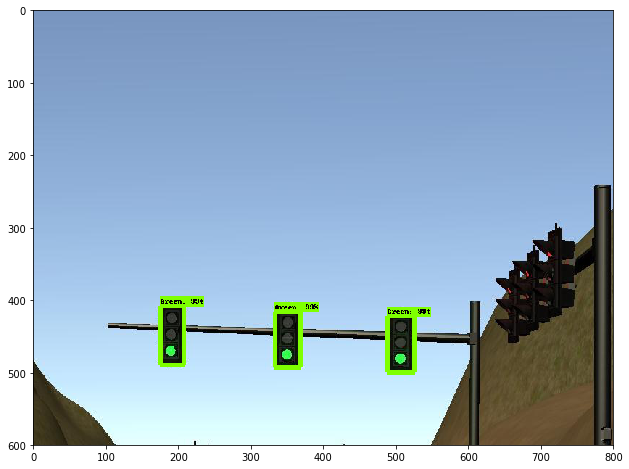

Green 0.99974984
Distance (metres) 0.0
Time in milliseconds 17.255067825317383 

Green 0.9994698
Distance (metres) 0.0
Time in milliseconds 17.255067825317383 

Green 0.9950649
Distance (metres) 0.0
Time in milliseconds 17.255067825317383 



In [7]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in TEST_IMAGE_PATHS:
            image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)

            time0 = time.time()

            # Actual detection.
            (boxes, scores, classes, num) = sess.run(
              [detection_boxes, detection_scores, detection_classes, num_detections],
              feed_dict={image_tensor: image_np_expanded})

            time1 = time.time()

            boxes = np.squeeze(boxes)
            scores = np.squeeze(scores)
            classes = np.squeeze(classes).astype(np.int32)
            
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, boxes, classes, scores,
                category_index,
                use_normalized_coordinates=True,
                line_thickness=6)
            
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()

            min_score_thresh = .50
            for i in range(boxes.shape[0]):
                if scores is None or scores[i] > min_score_thresh:

                    class_name = category_index[classes[i]]['name']
                    print('{}'.format(class_name), scores[i])
                    
                    fx =  0.97428
                    fy =  1.73205
                    perceived_width_x = (boxes[i][3] - boxes[i][1]) * 800
                    perceived_width_y = (boxes[i][2] - boxes[i][0]) * 600

                    # ymin, xmin, ymax, xmax = box
                    # depth_prime = (width_real * focal) / perceived_width
                    perceived_depth_x = ((.1 * fx) / perceived_width_x)
                    perceived_depth_y = ((.3 * fy) / perceived_width_y )

                    estimated_distance = round((perceived_depth_x + perceived_depth_y) / 2)
                    print("Distance (metres)", estimated_distance)
                    print("Time in milliseconds", (time1 - time0) * 1000, "\n")